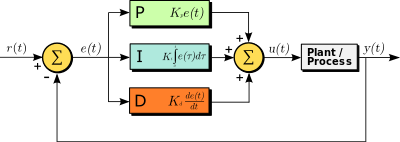

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from numpy import e,arange, random

In [74]:
# Добавляем пропорциональный, интегральный, дифференциальный регуляторы
def RHS(y,t,u,Kp,taup):
    # Kp - усиление процесса
    # taup - постоянная времени процесса
    f = -y/taup + Kp/taup * u
    return f

def hp(t,Kp,Td, Ki=0, Kd=0):
    if t<0:
        z=0
    elif Td==0:
        z=Kp+Ki*t
    else:
        z=Kp+Ki*t+Kp*Kd*e**(-t/Td)                  
    return z

def Process(t, Sp, Kp, taup, thetap, Kcp, Kci, Kcd):
    
    ns = len(t) - 1
    delta_t = t[1]-t[0]
    ndelay = int(np.ceil(thetap/delta_t))  
    
    #recording values
    u = np.zeros(ns+1)  
    pv = np.zeros(ns+1) 
    e = np.zeros(ns+1)  
    ie = np.zeros(ns+1)  
    dpv = np.zeros(ns+1) 
    P = np.zeros(ns+1)  
    I = np.zeros(ns+1)  
    D = np.zeros(ns+1)  
        
    u_hi = 100.0
    u_lo = -100.0
        
    for i in range(0,ns):
        e[i] = Sp[i] - pv[i]
        if i >= 1:
            dpv[i] = (pv[i] - pv[i-1])/delta_t
            ie[i] = ie[i-1] + e[i] * delta_t
        P[i] = Kcp * e[i]
        I[i] = Kci * ie[i]
        D[i] = Kcd * dpv[i]
        u[i] = u[0] + P[i] + I[i] + D[i]
        if u[i] > u_hi: #check upper limit
            u[i] = u_hi
            ie[i] = ie[i-1] + e[i] * delta_t
        if u[i] < u_lo: #check lower limit
            u[i] = u_lo
            ie[i] = ie[i-1] + e[i] * delta_t
        iu = max(0,i-ndelay)
        z = odeint(RHS, pv[i], [0,delta_t], args=(u[iu],Kp,taup))
        pv[i+1] = z[-1]
    u[ns] = u[ns-1]
    ie[ns] = ie[ns-1]
    P[ns] = P[ns-1]
    I[ns] = I[ns-1]
    D[ns] = D[ns-1]

    return (pv,u)  # скорость, "Управляющее воздействие"

In [75]:
ns = 1000
t = np.arange(0,ns+1,1)
#Model parameters
Kp = 1
taup = 250.0
thetap = 0.5

Sp = np.zeros(ns+1)
Sp[:100] = 70
Sp[200:300] = 30
Sp[300:400] = 10
Sp[400:500] = 50
Sp[500:800] = 5
Sp[800:] = 40

Kcp = 0
Kci = 0
Kcd = 0.0
(pv_21, op_21) = Process(t, Sp, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 5
Kci = 0
Kcd = 0.0
(pv_22, op_22) = Process(t, Sp, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 5
Kci = 0.4
Kcd = 0.0
(pv_23, op_23) = Process(t, Sp, Kp, taup, thetap, Kcp, Kci, Kcd)

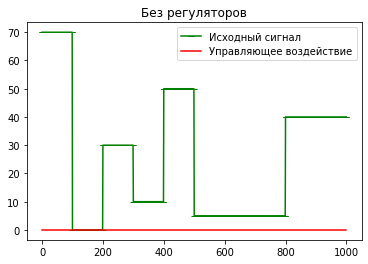

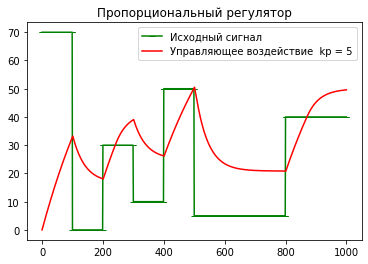

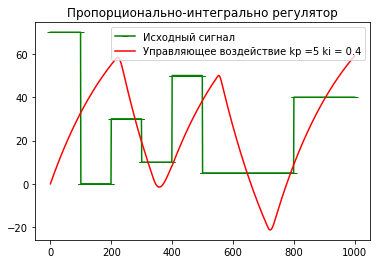

In [76]:
plt.title("Без регуляторов")
plt.plot(Sp, label='Исходный сигнал', marker='_', color = 'green')
plt.plot(op_21, label='Управляющее воздействие', color = 'red')
plt.legend()
plt.show()

plt.title("Пропорциональный регулятор")
plt.plot(Sp, label='Исходный сигнал', marker='_', color = 'green')
plt.plot(pv_22, label=f'Управляющее воздействие  kp = {Kcp}', color = 'red')
plt.legend()
plt.show()

plt.title("Пропорционально-интегрально регулятор")
plt.plot(Sp, label='Исходный сигнал', marker='_', color = 'green')
plt.plot(pv_23, label=f'Управляющее воздействие kp ={Kcp} ki = {Kci}', color = 'red')
plt.legend()
plt.show()

In [77]:
ns = 1000
t = np.arange(0,ns+1,1)
#Model parameters
Kp = 1
taup = 250.0
thetap = 0.5

Sp = np.zeros(ns+1)
Sp[:100] = 10
Sp[200:400] = 30
Sp[400:500] = 50
Sp[500:800] = 5
Sp[800:] = 40

Kcp = 0
Kci = 0
Kcd = 0.0
(pv_21, op_21) = Process(t, Sp, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 10
Kci = 0
Kcd = 0.0
(pv_22, op_22) = Process(t, Sp, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 10
Kci = 0.8
Kcd = 0.0
(pv_23, op_23) = Process(t, Sp, Kp, taup, thetap, Kcp, Kci, Kcd)

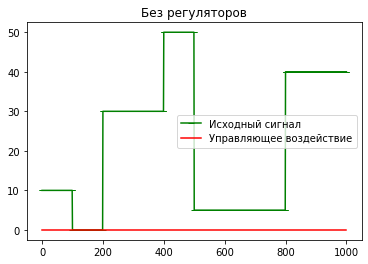

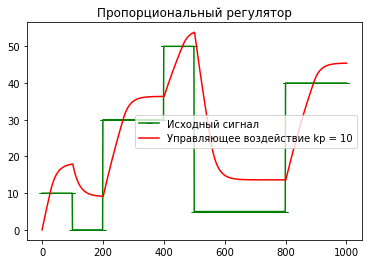

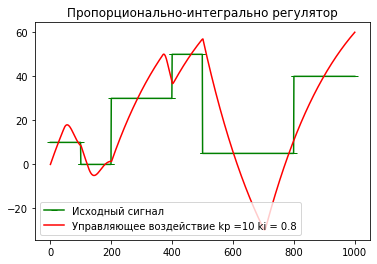

In [78]:
plt.title("Без регуляторов")
plt.plot(Sp, label='Исходный сигнал', marker='_', color = 'green')
plt.plot(op_21, label='Управляющее воздействие', color = 'red')
plt.legend()
plt.show()

plt.title("Пропорциональный регулятор")
plt.plot(Sp, label='Исходный сигнал', marker='_', color = 'green')
plt.plot(pv_22, label=f'Управляющее воздействие kp = {Kcp}', color = 'red')
plt.legend()
plt.show()

plt.title("Пропорционально-интегрально регулятор")
plt.plot(Sp, label='Исходный сигнал', marker='_', color = 'green')
plt.plot(pv_23, label=f'Управляющее воздействие kp ={Kcp} ki = {Kci}', color = 'red')
plt.legend()
plt.show()

In [79]:
Sp = np.zeros(ns+1)
Sp[:200] = 10
Sp[200:400] = 30
Sp[400:800] = 5
Sp[800:] = 40

Kcp = 0
Kci = 0
Kcd = 0.0
(pv_21, op_21) = Process(t, Sp, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 2
Kci = 0
Kcd = 0.0
(pv_22, op_22) = Process(t, Sp, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 2
Kci = 0.2
Kcd = 0.0
(pv_23, op_23) = Process(t, Sp, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 2
Kci = 0.2
Kcd = 5
(pv_24, op_24) = Process(t, Sp, Kp, taup, thetap, Kcp, Kci, Kcd)

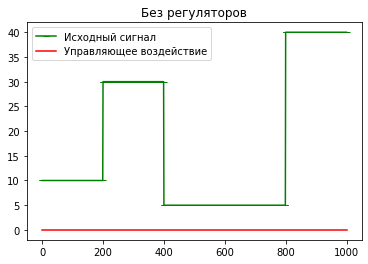

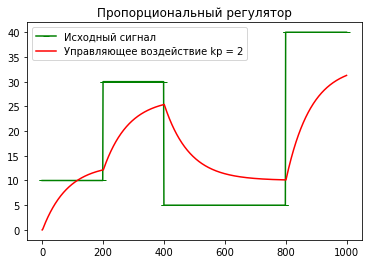

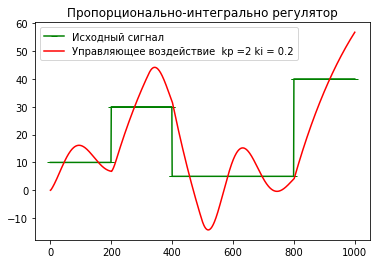

In [80]:
plt.title("Без регуляторов")
plt.plot(Sp, label='Исходный сигнал', marker='_', color = 'green')
plt.plot(op_21, label='Управляющее воздействие', color = 'red')
plt.legend()
plt.show()

plt.title("Пропорциональный регулятор")
plt.plot(Sp, label='Исходный сигнал', marker='_', color = 'green')
plt.plot(pv_22, label=f'Управляющее воздействие kp = {Kcp}', color = 'red')
plt.legend()
plt.show()

plt.title("Пропорционально-интегрально регулятор")
plt.plot(Sp, label='Исходный сигнал', marker='_', color = 'green')
plt.plot(pv_23, label=f'Управляющее воздействие  kp ={Kcp} ki = {Kci}', color = 'red')
plt.plot(label='label')
plt.legend()
plt.show()

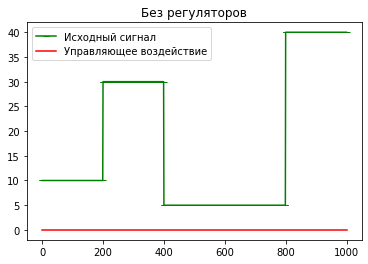

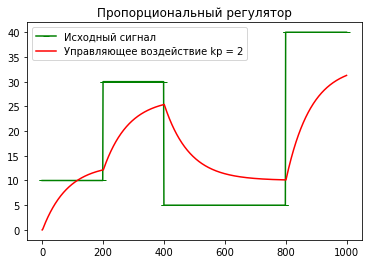

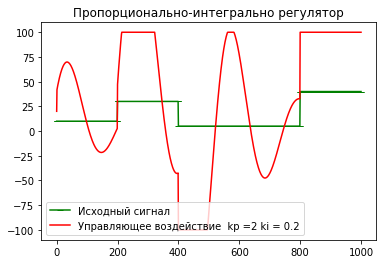

In [83]:
ns = 1000
t = np.arange(0,ns+1,1)
#Model parameters
Kp = 1
taup = 250.0
thetap = 0.5

# Моделирования для константного расстояния
Sp_const = np.zeros(ns+1)
Sp_const[:] = 10

Kcp = 0
Kci = 0
Kcd = 0.0
(pv_11, op_11) = Process(t, Sp_const, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 2
Kci = 0
Kcd = 0.0
(pv_12, op_12) = Process(t, Sp_const, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 2
Kci = 0.2
Kcd = 0.0
(pv_13, op_13) = Process(t, Sp_const, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 2
Kci = 0.2
Kcd = 0.1
(pv_14, op_14) = Process(t, Sp_const, Kp, taup, thetap, Kcp, Kci, Kcd)


# Моделирования для изменяющегося расстояния
Sp = np.zeros(ns+1)
Sp[:200] = 10
Sp[200:400] = 30
Sp[400:800] = 5
Sp[800:] = 40

Kcp = 0
Kci = 0
Kcd = 0.0
(pv_21, op_21) = Process(t, Sp, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 2
Kci = 0
Kcd = 0.0
(pv_22, op_22) = Process(t, Sp, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 2
Kci = 0.2
Kcd = 0.0
(pv_23, op_23) = Process(t, Sp, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 2
Kci = 0.2
Kcd = 5
(pv_24, op_24) = Process(t, Sp, Kp, taup, thetap, Kcp, Kci, Kcd)


plt.title("Без регуляторов")
plt.plot(Sp, label='Исходный сигнал', marker='_', color = 'green')
plt.plot(op_21, label='Управляющее воздействие', color = 'red')
plt.legend()
plt.show()

plt.title("Пропорциональный регулятор")
plt.plot(Sp, label='Исходный сигнал', marker='_', color = 'green')
plt.plot(pv_22, label=f'Управляющее воздействие kp = {Kcp}', color = 'red')
plt.legend()
plt.show()

plt.title("Пропорционально-интегрально регулятор")
plt.plot(Sp, label='Исходный сигнал', marker='_', color = 'green')
plt.plot(op_23, label=f'Управляющее воздействие  kp ={Kcp} ki = {Kci}', color = 'red')
plt.plot(label='label')
plt.legend()
plt.show()

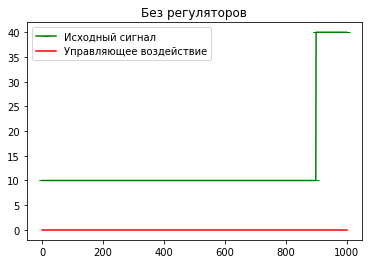

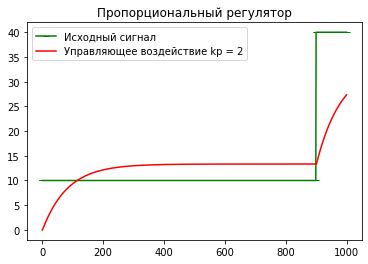

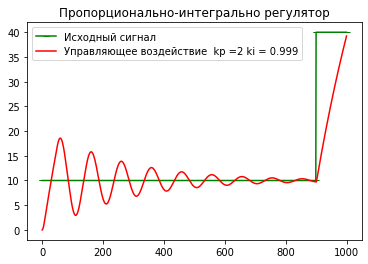

In [101]:
ns = 1000
t = np.arange(0,ns+1,1)
#Model parameters
Kp = 1
taup = 250.0
thetap = 0.5

# Моделирования для константного расстояния
Sp_const = np.zeros(ns+1)
Sp_const[:] = 10

Kcp = 0
Kci = 0
Kcd = 0.0
(pv_11, op_11) = Process(t, Sp_const, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 2
Kci = 0
Kcd = 0.0
(pv_12, op_12) = Process(t, Sp_const, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 2
Kci = 0.2
Kcd = 0.0
(pv_13, op_13) = Process(t, Sp_const, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 2
Kci = 0.2
Kcd = 0.1
(pv_14, op_14) = Process(t, Sp_const, Kp, taup, thetap, Kcp, Kci, Kcd)


# Моделирования для изменяющегося расстояния
Sp = np.zeros(ns+1)
Sp[:900] = 10
Sp[900:] = 40

Kcp = 0
Kci = 0
Kcd = 0.0
(pv_21, op_21) = Process(t, Sp, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 2
Kci = 0
(pv_22, op_22) = Process(t, Sp, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 2
Kci = .999
(pv_23, op_23) = Process(t, Sp, Kp, taup, thetap, Kcp, Kci, Kcd)



plt.title("Без регуляторов")
plt.plot(Sp, label='Исходный сигнал', marker='_', color = 'green')
plt.plot(op_21, label='Управляющее воздействие', color = 'red')
plt.legend()
plt.show()

plt.title("Пропорциональный регулятор")
plt.plot(Sp, label='Исходный сигнал', marker='_', color = 'green')
plt.plot(pv_22, label=f'Управляющее воздействие kp = {Kcp}', color = 'red')
plt.legend()
plt.show()

plt.title("Пропорционально-интегрально регулятор")
plt.plot(Sp, label='Исходный сигнал', marker='_', color = 'green')
plt.plot(pv_23, label=f'Управляющее воздействие  kp ={Kcp} ki = {Kci}', color = 'red')
plt.plot(label='label')
plt.legend()
plt.show()

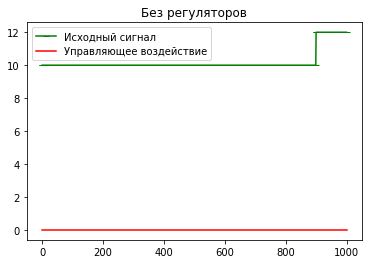

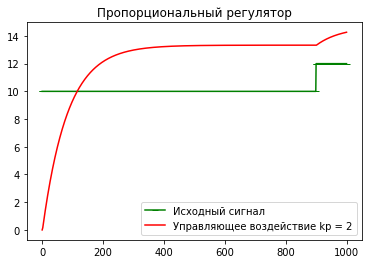

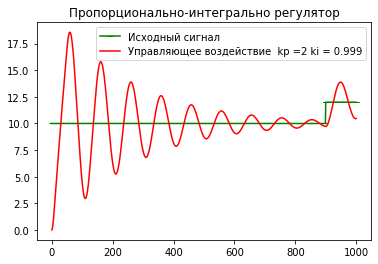

In [106]:
ns = 1000
t = np.arange(0,ns+1,1)
#Model parameters
Kp = 1
taup = 250.0
thetap = 0.5

# Моделирования для константного расстояния
Sp_const = np.zeros(ns+1)
Sp_const[:] = 10

Kcp = 0
Kci = 0
Kcd = 0.0
(pv_11, op_11) = Process(t, Sp_const, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 2
Kci = 0
Kcd = 0.0
(pv_12, op_12) = Process(t, Sp_const, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 2
Kci = 0.2
Kcd = 0.0
(pv_13, op_13) = Process(t, Sp_const, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 2
Kci = 0.2
Kcd = 0.1
(pv_14, op_14) = Process(t, Sp_const, Kp, taup, thetap, Kcp, Kci, Kcd)


# Моделирования для изменяющегося расстояния
Sp = np.zeros(ns+1)
Sp[:900] = 10
Sp[900:] = 12

Kcp = 0
Kci = 0
Kcd = 0.0
(pv_21, op_21) = Process(t, Sp, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 2
Kci = 0
(pv_22, op_22) = Process(t, Sp, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 2
Kci = .999
(pv_23, op_23) = Process(t, Sp, Kp, taup, thetap, Kcp, Kci, Kcd)



plt.title("Без регуляторов")
plt.plot(Sp, label='Исходный сигнал', marker='_', color = 'green')
plt.plot(op_21, label='Управляющее воздействие', color = 'red')
plt.legend()
plt.show()

plt.title("Пропорциональный регулятор")
plt.plot(Sp, label='Исходный сигнал', marker='_', color = 'green')
plt.plot(pv_22, label=f'Управляющее воздействие kp = {Kcp}', color = 'red')
plt.legend()
plt.show()

plt.title("Пропорционально-интегрально регулятор")
plt.plot(Sp, label='Исходный сигнал', marker='_', color = 'green')
plt.plot(pv_23, label=f'Управляющее воздействие  kp ={Kcp} ki = {Kci}', color = 'red')
plt.plot(label='label')
plt.legend()
plt.show()

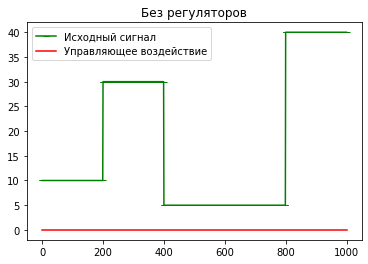

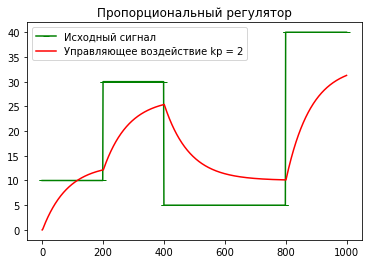

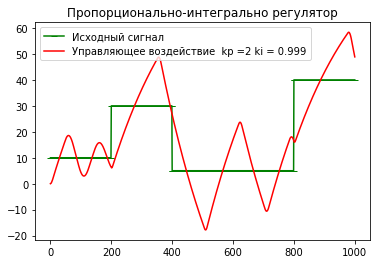

In [102]:
ns = 1000
t = np.arange(0,ns+1,1)
#Model parameters
Kp = 1
taup = 250.0
thetap = 0.5

# Моделирования для константного расстояния
Sp_const = np.zeros(ns+1)
Sp_const[:] = 10

Kcp = 0
Kci = 0
Kcd = 0.0
(pv_11, op_11) = Process(t, Sp_const, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 2
Kci = 0
Kcd = 0.0
(pv_12, op_12) = Process(t, Sp_const, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 2
Kci = 0.2
Kcd = 0.0
(pv_13, op_13) = Process(t, Sp_const, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 2
Kci = 0.2
Kcd = 0.1
(pv_14, op_14) = Process(t, Sp_const, Kp, taup, thetap, Kcp, Kci, Kcd)


# Моделирования для изменяющегося расстояния
Sp = np.zeros(ns+1)
Sp[:200] = 10
Sp[200:400] = 30
Sp[400:800] = 5
Sp[800:] = 40

Kcp = 0
Kci = 0
Kcd = 0.0
(pv_21, op_21) = Process(t, Sp, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 2
Kci = 0
Kcd = 0.0
(pv_22, op_22) = Process(t, Sp, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 2
Kci = 0.999
Kcd = 0.0
(pv_23, op_23) = Process(t, Sp, Kp, taup, thetap, Kcp, Kci, Kcd)



plt.title("Без регуляторов")
plt.plot(Sp, label='Исходный сигнал', marker='_', color = 'green')
plt.plot(op_21, label='Управляющее воздействие', color = 'red')
plt.legend()
plt.show()

plt.title("Пропорциональный регулятор")
plt.plot(Sp, label='Исходный сигнал', marker='_', color = 'green')
plt.plot(pv_22, label=f'Управляющее воздействие kp = {Kcp}', color = 'red')
plt.legend()
plt.show()

plt.title("Пропорционально-интегрально регулятор")
plt.plot(Sp, label='Исходный сигнал', marker='_', color = 'green')
plt.plot(pv_23, label=f'Управляющее воздействие  kp ={Kcp} ki = {Kci}', color = 'red')
plt.plot(label='label')
plt.legend()
plt.show()

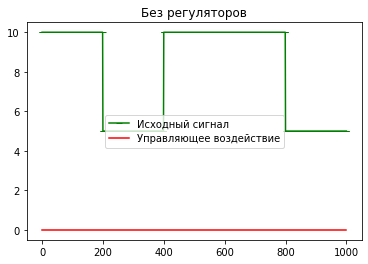

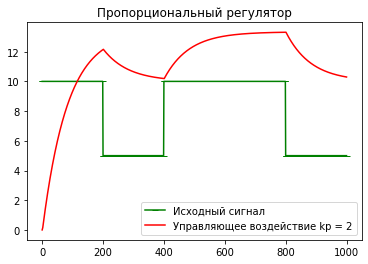

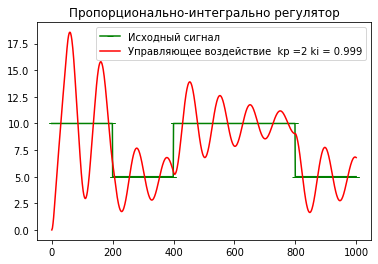

In [103]:
ns = 1000
t = np.arange(0,ns+1,1)
#Model parameters
Kp = 1
taup = 250.0
thetap = 0.5

# Моделирования для константного расстояния
Sp_const = np.zeros(ns+1)
Sp_const[:] = 10

Kcp = 0
Kci = 0
Kcd = 0.0
(pv_11, op_11) = Process(t, Sp_const, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 2
Kci = 0
Kcd = 0.0
(pv_12, op_12) = Process(t, Sp_const, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 2
Kci = 0.2
Kcd = 0.0
(pv_13, op_13) = Process(t, Sp_const, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 2
Kci = 0.2
Kcd = 0.1
(pv_14, op_14) = Process(t, Sp_const, Kp, taup, thetap, Kcp, Kci, Kcd)


# Моделирования для изменяющегося расстояния
Sp = np.zeros(ns+1)
Sp[:200] = 10
Sp[200:400] = 5
Sp[400:800] = 10
Sp[800:] = 5

Kcp = 0
Kci = 0
Kcd = 0.0
(pv_21, op_21) = Process(t, Sp, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 2
Kci = 0
Kcd = 0.0
(pv_22, op_22) = Process(t, Sp, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 2
Kci = 0.999
Kcd = 0.0
(pv_23, op_23) = Process(t, Sp, Kp, taup, thetap, Kcp, Kci, Kcd)



plt.title("Без регуляторов")
plt.plot(Sp, label='Исходный сигнал', marker='_', color = 'green')
plt.plot(op_21, label='Управляющее воздействие', color = 'red')
plt.legend()
plt.show()

plt.title("Пропорциональный регулятор")
plt.plot(Sp, label='Исходный сигнал', marker='_', color = 'green')
plt.plot(pv_22, label=f'Управляющее воздействие kp = {Kcp}', color = 'red')
plt.legend()
plt.show()

plt.title("Пропорционально-интегрально регулятор")
plt.plot(Sp, label='Исходный сигнал', marker='_', color = 'green')
plt.plot(pv_23, label=f'Управляющее воздействие  kp ={Kcp} ki = {Kci}', color = 'red')
plt.plot(label='label')
plt.legend()
plt.show()

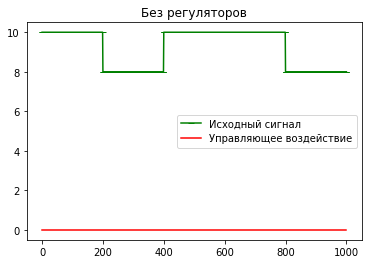

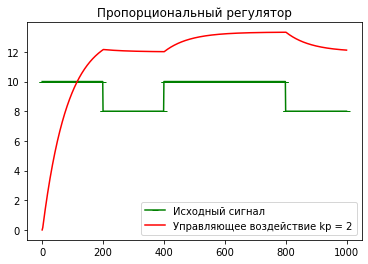

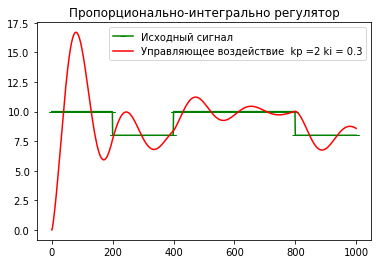

In [105]:
ns = 1000
t = np.arange(0,ns+1,1)
#Model parameters
Kp = 1
taup = 250.0
thetap = 0.5

# Моделирования для константного расстояния
Sp_const = np.zeros(ns+1)
Sp_const[:] = 10

Kcp = 0
Kci = 0
Kcd = 0.0
(pv_11, op_11) = Process(t, Sp_const, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 2
Kci = 0
Kcd = 0.0
(pv_12, op_12) = Process(t, Sp_const, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 2
Kci = 0.2
Kcd = 0.0
(pv_13, op_13) = Process(t, Sp_const, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 2
Kci = 0.2
Kcd = 0.1
(pv_14, op_14) = Process(t, Sp_const, Kp, taup, thetap, Kcp, Kci, Kcd)


# Моделирования для изменяющегося расстояния
Sp = np.zeros(ns+1)
Sp[:200] = 10
Sp[200:400] = 8
Sp[400:800] = 10
Sp[800:] = 8

Kcp = 0
Kci = 0
Kcd = 0.0
(pv_21, op_21) = Process(t, Sp, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 2
Kci = 0
Kcd = 0.0
(pv_22, op_22) = Process(t, Sp, Kp, taup, thetap, Kcp, Kci, Kcd)

Kcp = 2
Kci = 0.3
Kcd = 0.0
(pv_23, op_23) = Process(t, Sp, Kp, taup, thetap, Kcp, Kci, Kcd)



plt.title("Без регуляторов")
plt.plot(Sp, label='Исходный сигнал', marker='_', color = 'green')
plt.plot(op_21, label='Управляющее воздействие', color = 'red')
plt.legend()
plt.show()

plt.title("Пропорциональный регулятор")
plt.plot(Sp, label='Исходный сигнал', marker='_', color = 'green')
plt.plot(pv_22, label=f'Управляющее воздействие kp = {Kcp}', color = 'red')
plt.legend()
plt.show()

plt.title("Пропорционально-интегрально регулятор")
plt.plot(Sp, label='Исходный сигнал', marker='_', color = 'green')
plt.plot(pv_23, label=f'Управляющее воздействие  kp ={Kcp} ki = {Kci}', color = 'red')
plt.plot(label='label')
plt.legend()
plt.show()